In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

### laoding datasets and make pd.dataframe


In [7]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

### iris_df 

In [9]:
iris_df.merge(pd.DataFrame(iris.target,columns=['species']),left_index=True,right_index=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### some visulizations before selecting model
- scatter plot
- Pair plots
- correlation heatmap
- feature importance plot
- bar plot
- distance matrix heatplot
- line plot

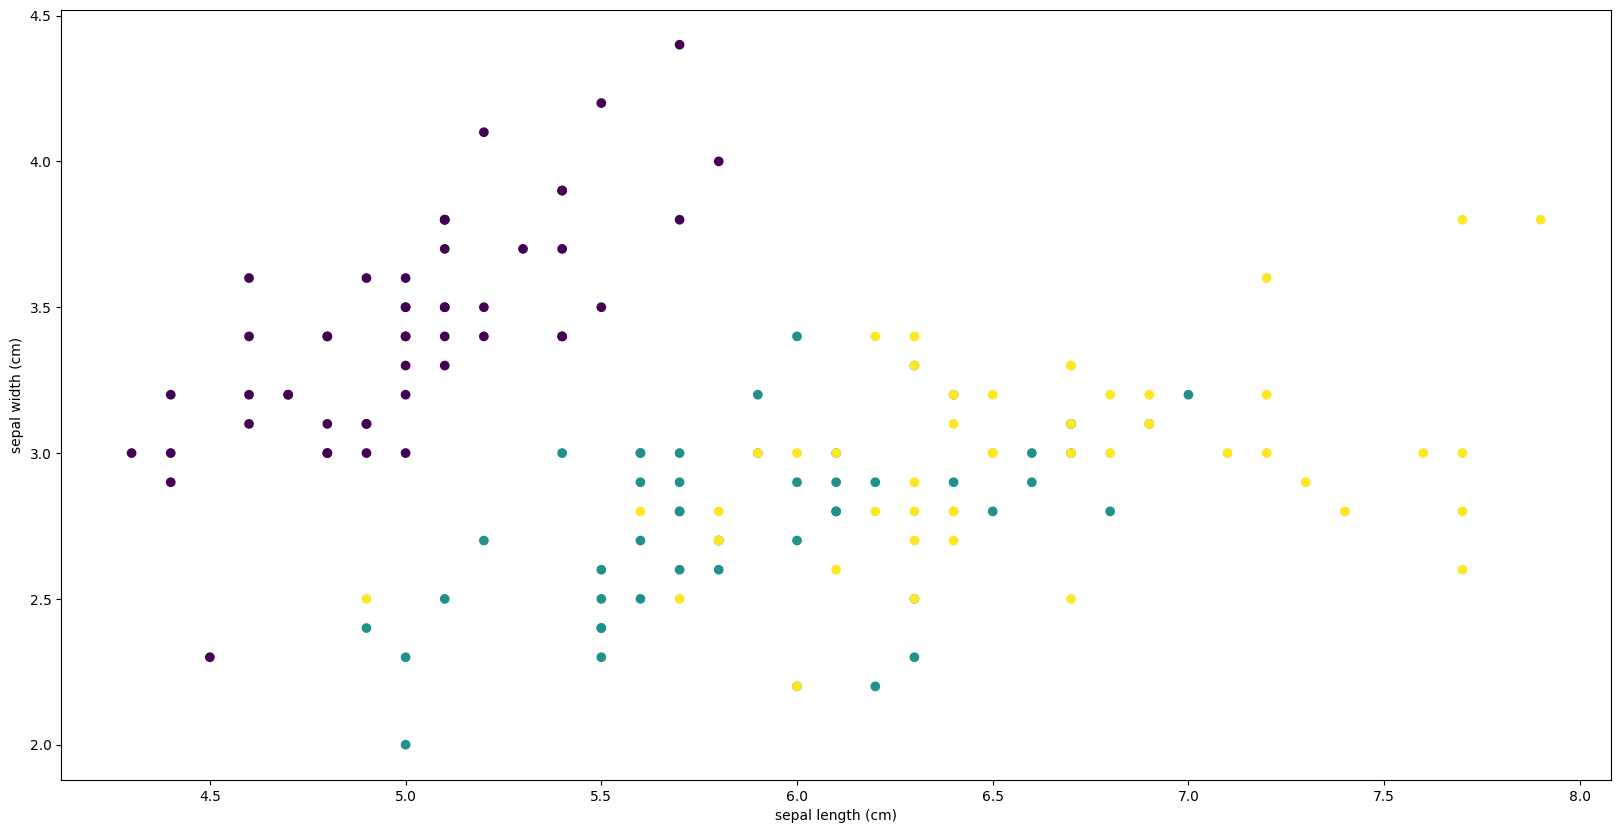

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=iris.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

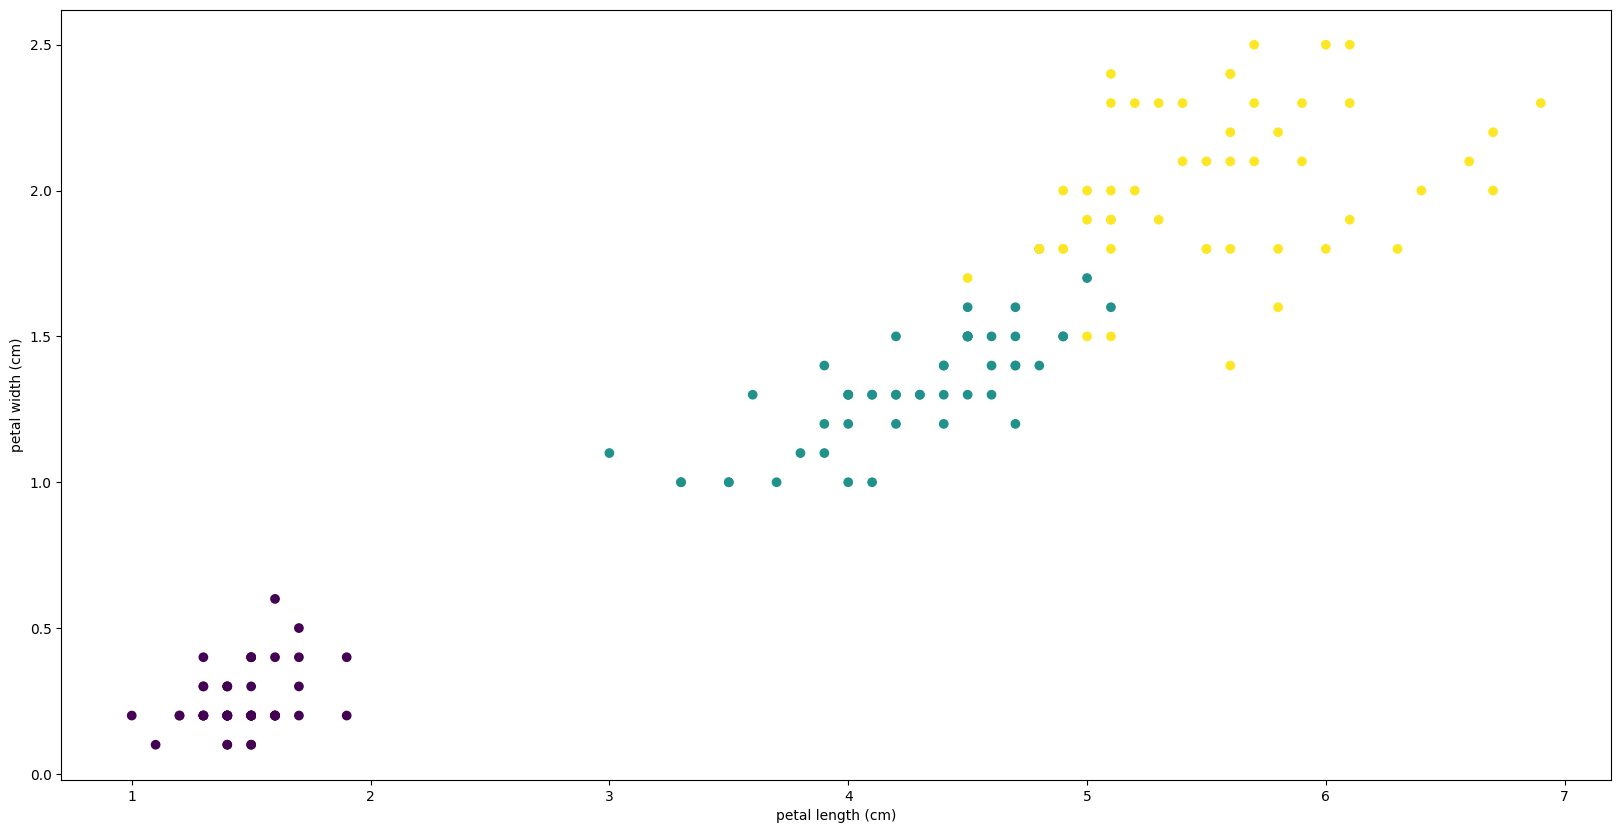

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(iris_df['petal length (cm)'],iris_df['petal width (cm)'],c=iris.target)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [16]:
import seaborn as sns

<Figure size 2000x1000 with 0 Axes>

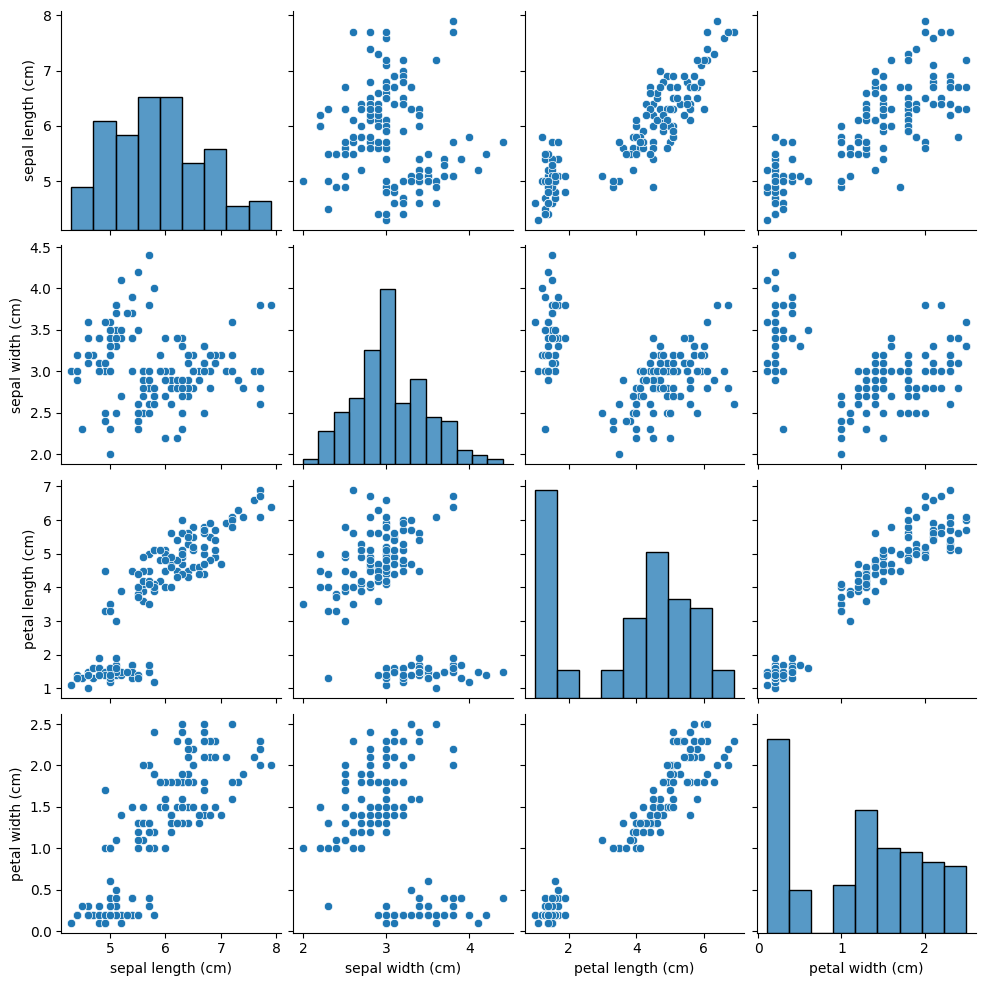

In [18]:
plt.figure(figsize=(20,10))
sns.pairplot(iris_df)
plt.show()

### count map to check #s of target values in datasets

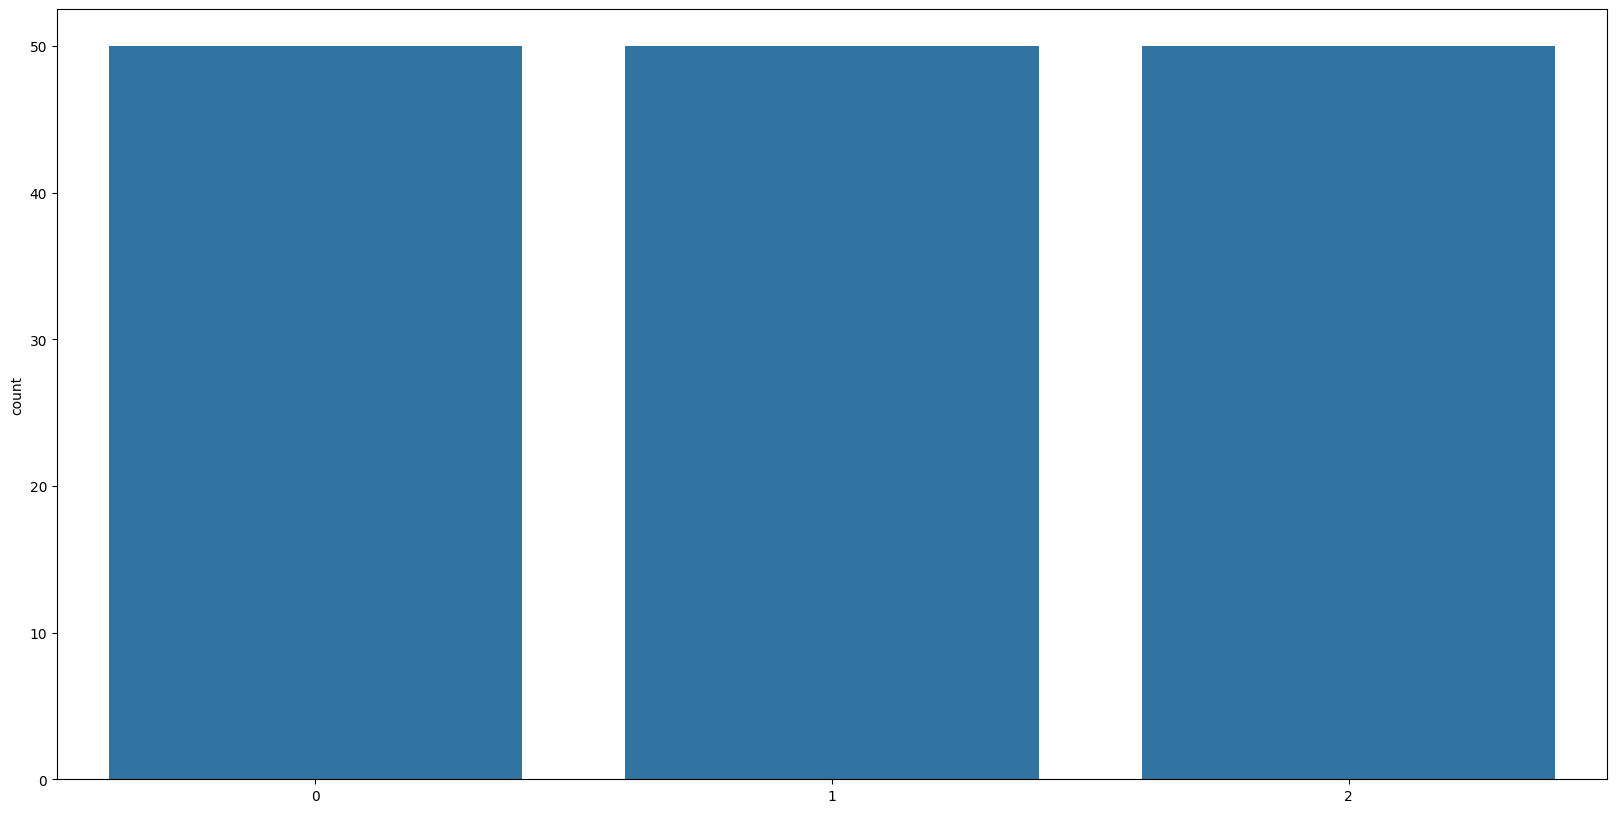

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x=iris.target)
plt.show()

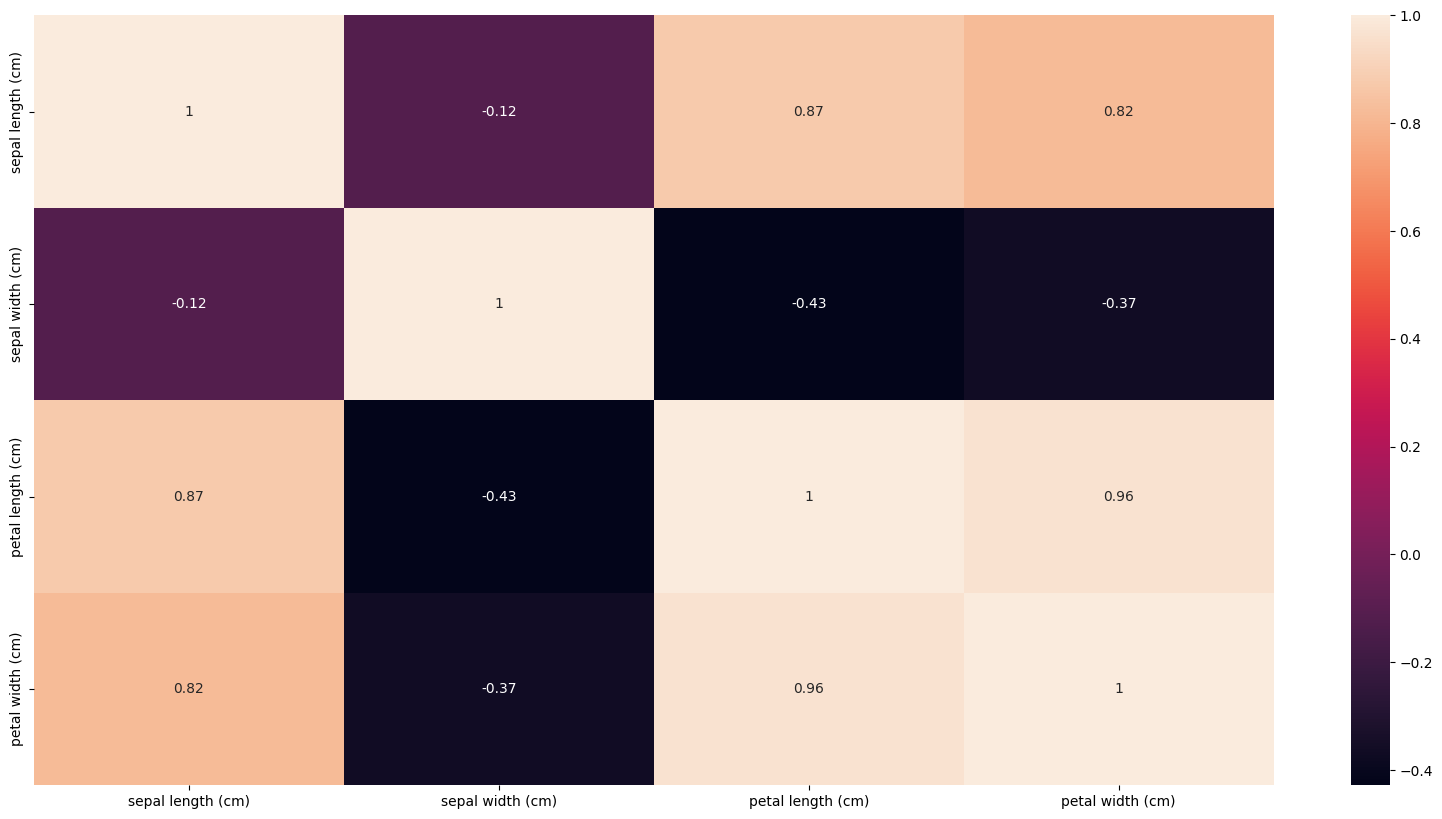

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(iris_df.corr(),annot=True)
plt.show()

### we can use knn since features are not highly correlated

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### dividing the data for training and test

In [31]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)

### scalling data

In [41]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
def knn_classifier(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [46]:
for k in range(1,11):
    print(f'Accuracy for k={k} is {knn_classifier(k)}')

Accuracy for k=1 is 0.9666666666666667
Accuracy for k=2 is 0.9333333333333333
Accuracy for k=3 is 0.9666666666666667
Accuracy for k=4 is 0.9333333333333333
Accuracy for k=5 is 0.9666666666666667
Accuracy for k=6 is 0.9333333333333333
Accuracy for k=7 is 0.9666666666666667
Accuracy for k=8 is 0.9666666666666667
Accuracy for k=9 is 0.9666666666666667
Accuracy for k=10 is 0.9666666666666667


In [54]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets

In [56]:
y

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


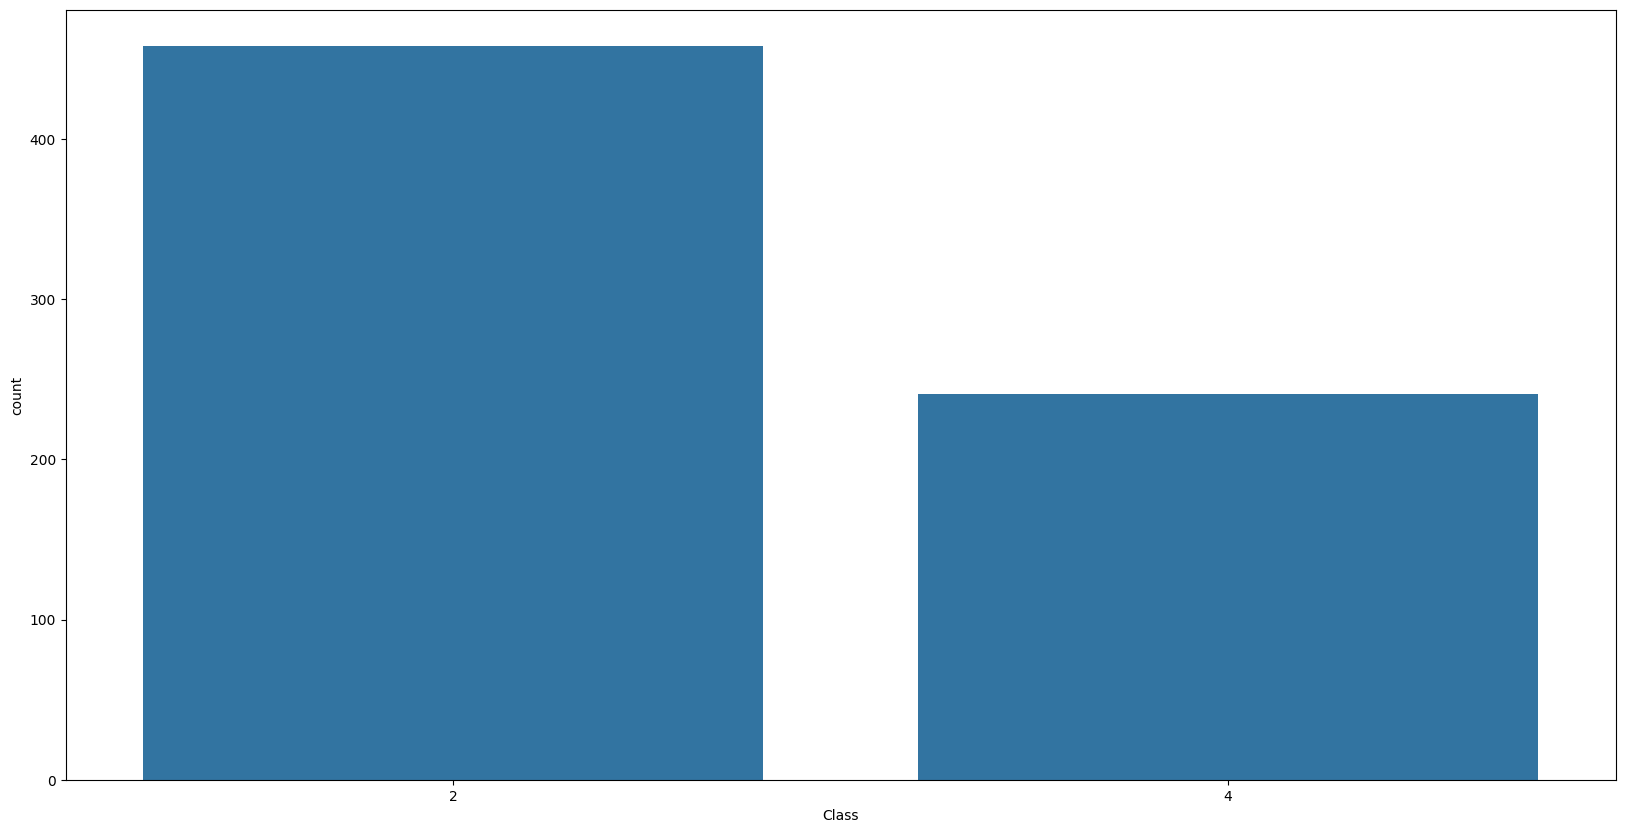

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(x=y.Class)
plt.show()

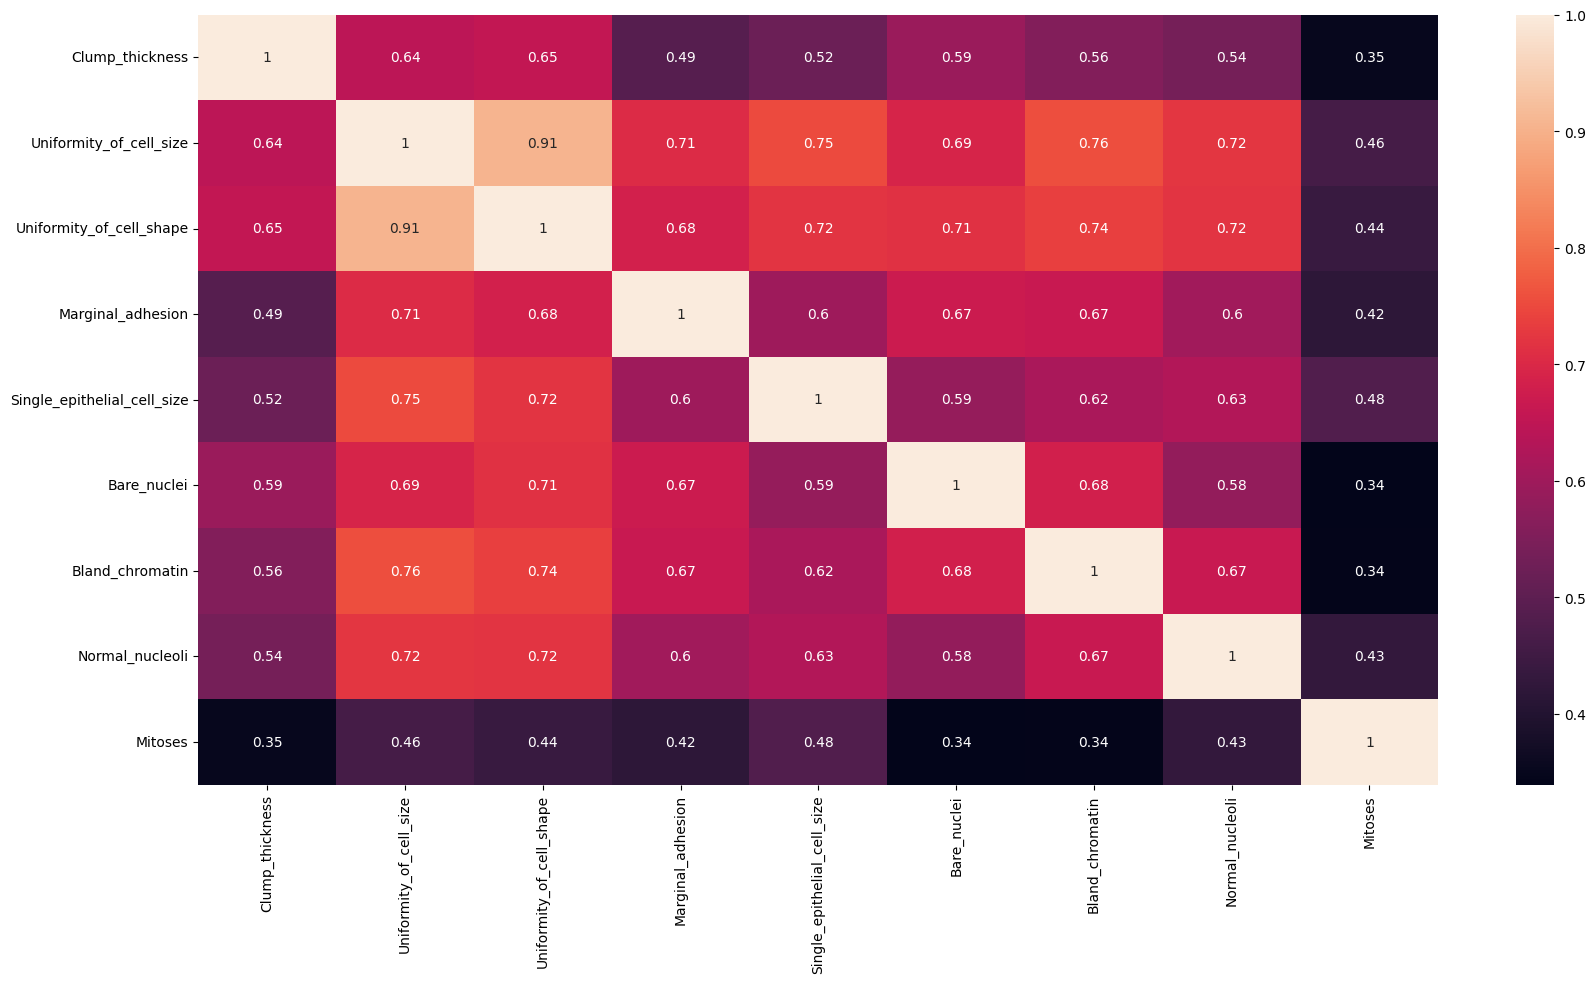

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [69]:
from sklearn.decomposition import PCA

In [73]:
X.fillna(0,inplace=True)

/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_12822/1567776033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0,inplace=True)


In [77]:
for i in range(1,10):
    pca=PCA(n_components=i)
    X_pca=pca.fit_transform(X)
    print(f'Explained variance for {i} components is {pca.explained_variance_ratio_.sum()}')

Explained variance for 1 components is 0.6884632692233996
Explained variance for 2 components is 0.762721143389724
Explained variance for 3 components is 0.8234302385499536
Explained variance for 4 components is 0.8673715273008944
Explained variance for 5 components is 0.9061021099217695
Explained variance for 6 components is 0.940869482396019
Explained variance for 7 components is 0.9660372407838828
Explained variance for 8 components is 0.988615718635919
Explained variance for 9 components is 1.0000000000000002


In [78]:
pca=PCA(n_components=9)
X_pca=pca.fit_transform(X)

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [80]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [81]:
for k in range(1,11):
    print(f'Accuracy for k={k} is {knn_classifier(k)}')

Accuracy for k=1 is 0.9142857142857143
Accuracy for k=2 is 0.8857142857142857
Accuracy for k=3 is 0.9428571428571428
Accuracy for k=4 is 0.9357142857142857
Accuracy for k=5 is 0.9428571428571428
Accuracy for k=6 is 0.9428571428571428
Accuracy for k=7 is 0.9428571428571428
Accuracy for k=8 is 0.9428571428571428
Accuracy for k=9 is 0.9357142857142857
Accuracy for k=10 is 0.9357142857142857


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighb

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
for k in range(1,11):
    print(f'Accuracy for k={k} is {knn_classifier(k)}')

Accuracy for k=1 is 0.95
Accuracy for k=2 is 0.9142857142857143
Accuracy for k=3 is 0.9714285714285714
Accuracy for k=4 is 0.9642857142857143
Accuracy for k=5 is 0.9785714285714285
Accuracy for k=6 is 0.9642857142857143
Accuracy for k=7 is 0.9714285714285714
Accuracy for k=8 is 0.9714285714285714
Accuracy for k=9 is 0.9714285714285714
Accuracy for k=10 is 0.9714285714285714


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighb

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

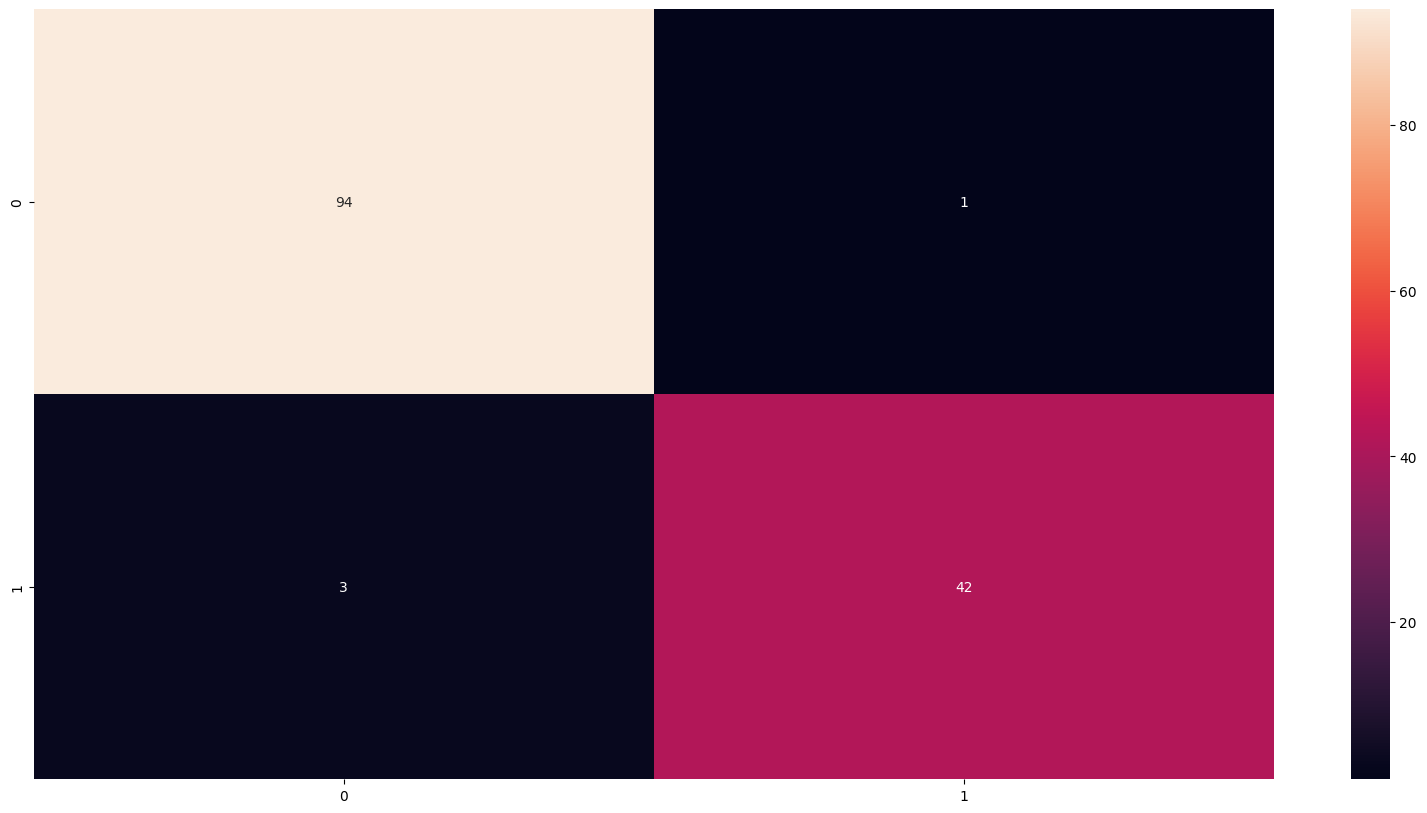

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()